### PCA 2 (Core)
## Visualización de Datos con Componentes Principales

### Descripción:
En esta actividad, utilizarás el Análisis de Componentes Principales (PCA) para visualizar datos en un espacio de menor dimensionalidad. Trabajarás con el famoso dataset «Iris» para reducir sus características a dos componentes principales y visualizar cómo se distribuyen las diferentes clases en este nuevo espacio de características.

Enlace al dataset: https://www.kaggle.com/uciml/iris

### Objetivo
El objetivo es reducir la dimensionalidad del dataset «Iris» mediante PCA, visualizando las clases en el nuevo espacio bidimensional y evaluando si los componentes principales son capaces de capturar adecuadamente la variabilidad de los datos.

In [ ]:
# Importamos las librerias a utilizar
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris


1. Carga de datos:
* Descarga el dataset «Iris» de Kaggle. Examina las características disponibles, que incluyen el largo y ancho de los sépalos y pétalos de tres especies de flores.
* Asegúrate de que los datos no contengan valores nulos o atípicos.

In [ ]:
# Cargar el dataset Iris
iris = load_iris()

# Explorar el dataset
X = iris.data  # Features (64 dimensiones)
y = iris.target  # Target (dígitos del 0 al 9)

# Crear un DataFrame para visualizar
df_iris = pd.DataFrame(X, columns=[f"Columna_{i}" for i in range(X.shape[1])])
df_iris['target'] = y

# Mostrar las primeras filas
print(f"Dimensiones del dataset: Features: {X.shape[1]}, Ejemplos: {X.shape[0]}")
print("Primeras 5 filas del dataset:")
df_iris.head()



Dimensiones del dataset: Features: 4, Ejemplos: 150
Primeras 5 filas del dataset:


,Columna_0,Columna_1,Columna_2,Columna_3,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
# Contamos cuantos valores nulos existen por columna
cantNulos = df_iris.isnull().sum()
print(f'Valores nulos en el Dataset:\n{cantNulos}')

# Exploramos las estadisticas del dataset completo. Usamos .T Para verificar los datos de una forma mas cómoda
descripcionDataset =  df_iris.describe()
print(f'Distribución estadística de los datos:\n{descripcionDataset}')

Valores nulos en el Dataset:
Columna_0    0
Columna_1    0
Columna_2    0
Columna_3    0
target       0
dtype: int64
Distribución estadística de los datos:
        Columna_0   Columna_1   Columna_2   Columna_3      target
count  150.000000  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.057333    3.758000    1.199333    1.000000
std      0.828066    0.435866    1.765298    0.762238    0.819232
min      4.300000    2.000000    1.000000    0.100000    0.000000
25%      5.100000    2.800000    1.600000    0.300000    0.000000
50%      5.800000    3.000000    4.350000    1.300000    1.000000
75%      6.400000    3.300000    5.100000    1.800000    2.000000
max      7.900000    4.400000    6.900000    2.500000    2.000000


2. Exploración y preprocesamiento de datos:
* Realiza una normalización de los datos, ya que PCA requiere que las características tengan la misma escala para funcionar de manera efectiva.
* Observa la distribución inicial de las variables mediante gráficos de dispersión o histogramas.

In [10]:
# Escalar los datos para tener media 0 y desviación estándar 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Mostrar un resumen de los datos escalados
print("Resumen de datos escalados:")
print(f"Media por característica (aproximadamente 0): {X_scaled.mean(axis=0)[:5]}")
print(f"Desviación estándar por característica (aproximadamente 1): {X_scaled.std(axis=0)[:5]}")

Resumen de datos escalados:
Media por característica (aproximadamente 0): [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
Desviación estándar por característica (aproximadamente 1): [1. 1. 1. 1.]


3. Aplicación de PCA:
* Implementa PCA para reducir las cuatro dimensiones del dataset «Iris» a solo dos componentes principales.
* Calcula la «explained variance» para estos dos componentes y discute qué porcentaje de la variabilidad total de los datos está capturada en el espacio bidimensional.

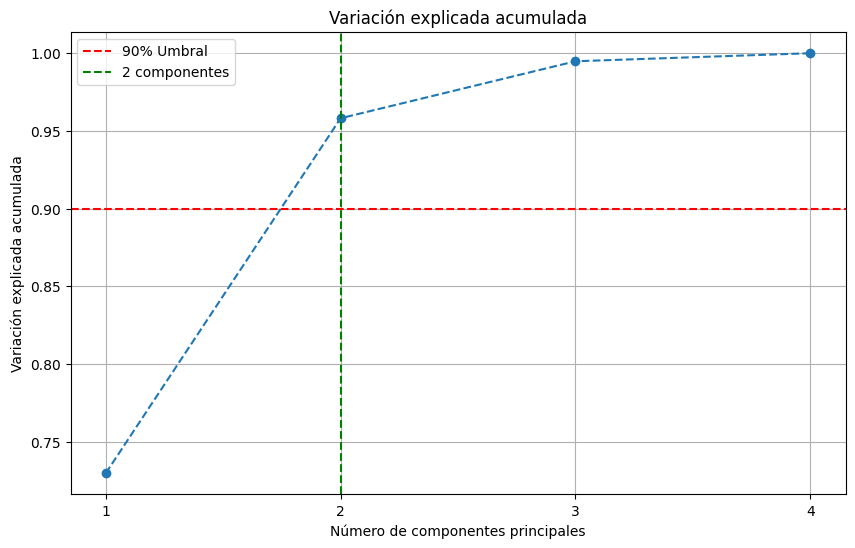

Variación explicada acumulada:
Componente 1: 72.96%
Componente 2: 95.81%
Componente 3: 99.48%
Componente 4: 100.00%


In [23]:
# Reducir a 2 los componentes
pca_full = PCA(n_components=4)
pca_full.fit(X_scaled)

# Variación explicada acumulada
explained_variance_cumulative = np.cumsum(pca_full.explained_variance_ratio_)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(range(1, 5), explained_variance_cumulative, marker='o', linestyle='--')
plt.title('Variación explicada acumulada')
plt.xlabel('Número de componentes principales')
plt.ylabel('Variación explicada acumulada')
plt.xticks(range(1, 5))  # Mostrar solo cada dos componentes para claridad
plt.grid(True)

# Marcar el umbral del 90% como referencia
threshold = 0.9
optimal_components = np.argmax(explained_variance_cumulative >= threshold) + 1
plt.axhline(y=threshold, color='r', linestyle='--', label=f'90% Umbral')
plt.axvline(x=optimal_components, color='g', linestyle='--', label=f'{optimal_components} componentes')

plt.legend()
plt.show()

# Mostrar la varianza explicada acumulada para cada componente
print("Variación explicada acumulada:")
for i, variance in enumerate(explained_variance_cumulative, 1):
    print(f"Componente {i}: {variance:.2%}")


In [24]:
# Aplicar PCA con el número seleccionado de componentes
pca_final = PCA(n_components=2)
X_pca_2 = pca_final.fit_transform(X_scaled)

explained_variance = pca_final.explained_variance_ratio_
print("Varianza explicada por cada componente principal:")
print(f"Componente 1: {explained_variance[0]:.2%}")
print(f"Componente 2: {explained_variance[1]:.2%}")

# Mostrar la varianza explicada acumulada con 31 componentes
explained_variance_31 = pca_final.explained_variance_ratio_.sum()
print(f"Varianza explicada total con 31 componentes: {explained_variance_31:.2%}")

# Dimensiones transformadas
print(f"Dimensiones originales: {X_scaled.shape[1]}")
print(f"Dimensiones reducidas: {X_pca_2.shape[1]}")

Varianza explicada por cada componente principal:
Componente 1: 72.96%
Componente 2: 22.85%
Varianza explicada total con 31 componentes: 95.81%
Dimensiones originales: 4
Dimensiones reducidas: 2


4. Visualización de los componentes principales:
* Proyecta los datos en el espacio bidimensional formado por los dos primeros componentes principales.
* Utiliza diferentes colores para representar cada una de las tres clases de flores en el gráfico y observa cómo se agrupan las clases en el espacio de los componentes principales.

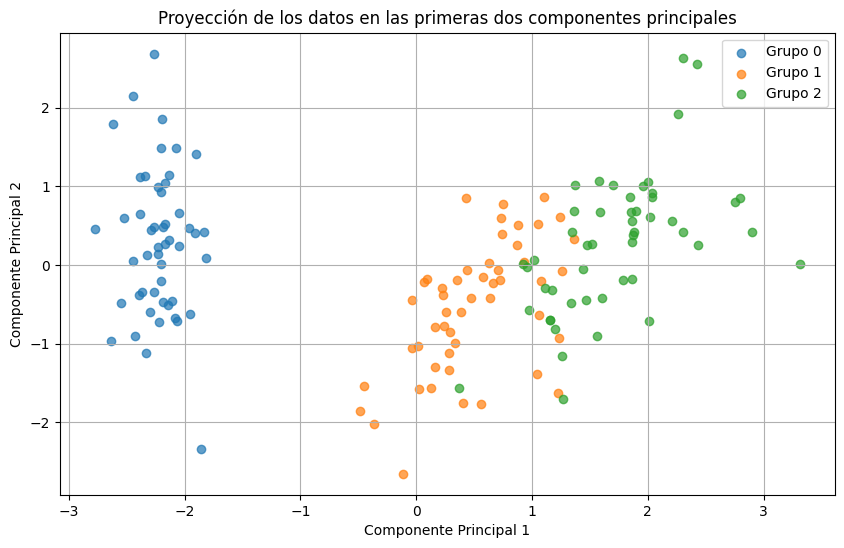

In [27]:
plt.figure(figsize=(10, 6))
for i in range(len(iris.target_names)):
    subset = X_pca_2[y == i][:, :2]  # Usar solo las primeras 2 componentes
    plt.scatter(subset[:, 0], subset[:, 1], label=f'Grupo {i}', alpha=0.7)

plt.title('Proyección de los datos en las primeras dos componentes principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()

5. Interpretación de los resultados:
* Analiza los coeficientes de los dos componentes principales y explica qué variables tienen la mayor influencia en estos.
* Discute si PCA es capaz de separar correctamente las clases y cómo este análisis puede mejorar la comprensión de los datos.

In [29]:
pca_components = pd.DataFrame(pca_final.components_, columns=[f"Grupo_{i}" for i in range(X.shape[1])], index=[f"Componente_{i}" for i in range(1, 3)])

# Mostrar las características más importantes para la primera componente principal
print("Características más importantes para la primera componente principal:")
print(pca_components.loc["Componente_1"].sort_values(ascending=False).head(10))

Características más importantes para la primera componente principal:
Grupo_2    0.580413
Grupo_3    0.564857
Grupo_0    0.521066
Grupo_1   -0.269347
Name: Componente_1, dtype: float64


Análisis de Resultados:
* Compara la distribución de las clases en el espacio bidimensional con la distribución original de las variables. ¿Qué tan bien puede PCA capturar las relaciones entre las clases en este caso?
* Realiza un reporte que incluya el gráfico de los componentes principales y discute la utilidad de PCA para la visualización de datos en problemas de clasificación.

Conclusión:
* Esta actividad se centra en la visualización de datos utilizando PCA. La reducción de dimensionalidad mediante PCA no solo ayuda a visualizar los datos en un espacio más pequeño, sino que también permite identificar las relaciones entre las variables y las clases.